## Supervised learning assignment
- Name: Daan Steur
- Studentnumber: 379943
- Supervisor: Dr. Dave Langers
- Course: DSLS Data Science 3: Deep learning
- Date: 24th of june

# analysis of rice variety classification using deep learning

## Assignment
Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features. These are usually features such as texture, shape, and color. With these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds. In this study, Arborio, Basmati, Ipsala, Jasmine and Karacadag, which are five different varieties of rice often grown in Turkey, were used. A total of 75,000 grain images, 15,000 from each of these varieties, are included in the dataset. The successfully classification of these images is useful for evaluating the quality of the seeds.


## data source
[Rice Image Dataset](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset)

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras
import opendatasets as od
import glob as glob



### Data Download

Automatic download with opendatasets

In [ ]:
# this command will automatically download the dataset in about 4 minutes
# requirements for this command: pip install opendatasets
od.download("https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/download")

Manual download

In [3]:
# # if the command is not working, you can download the dataset manually
# def create_dir(dir_name):
#     if not os.path.exists(dir_name):
#         os.makedirs(dir_name)
        
# create_dir('rice-image-dataset')

# # Data download link
# download_link = "https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/download"

# # after downloading the dataset, unzip it
# # !unzip rice-image-dataset.zip


The rest is designed to run if the automatic download was successful.
If the automatic download was not successful,
you can download the data manually and put it in the correct folder created by the function above.
and give the folder's that folder the name "Rice_Image_Dataset". or change the data_dir in the cell below to the location of the folder. 

### Exploration & preprocessing

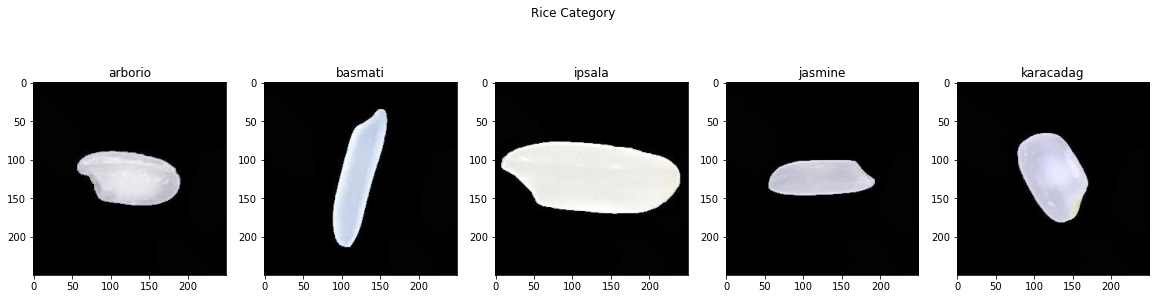

In [4]:

# Separating the categories
data_dir = 'rice-image-dataset/Rice_Image_Dataset/'


arborio = glob.glob(f'{data_dir}Arborio/*.jpg')[:1]
basmati = glob.glob(f'{data_dir}Basmati/*.jpg')[:1]
ipsala = glob.glob(f'{data_dir}Ipsala/*.jpg')[:1]
jasmine = glob.glob(f'{data_dir}Jasmine/*.jpg')[:1]
karacadag = glob.glob(f'{data_dir}Karacadag/*.jpg')[:1]

# Create a figure with all the rice categories
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

Found 60000 images belonging to 5 classes.
(20, 100, 100, 3) float32 (20, 5) float32


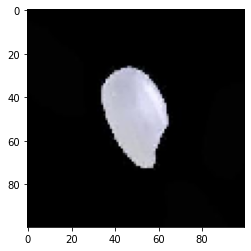

Found 15000 images belonging to 5 classes.
(20, 100, 100, 3) float32 (20, 5) float32


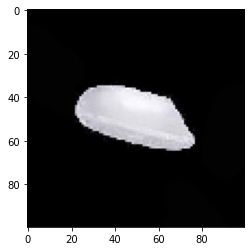

In [5]:
# create image generator and split between training and testing data using the generator. 

image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# get training data using generator
train_generator = image_generator.flow_from_directory(shuffle=True,
                                                      directory=data_dir,
                                                      batch_size=20,
                                                      color_mode='rgb',
                                                      target_size=(100,100),
                                                      subset='training',
                                                      class_mode='categorical')
# assignt the Training data to variables
for x_train, y_train in train_generator:
    print(x_train.shape, x_train.dtype, y_train.shape, y_train.dtype)
    break
# check if variables are saved correctly
plt.imshow(x_train[1])
plt.show()


# get testing data using generator
test_generator = image_generator.flow_from_directory(shuffle=True,
                                                      directory=data_dir,
                                                      batch_size=20,
                                                      color_mode='rgb',
                                                      target_size=(100,100),
                                                      subset='validation',
                                                      class_mode='categorical')
# assignt the testing data to variables
for x_test, y_test in test_generator:
    print(x_test.shape, x_test.dtype, y_test.shape, y_test.dtype)
    break
# check if variables are saved correctly
plt.imshow(x_test[1])
plt.show()
                                                      
                                            

tried three difference target sizes, 250, which was the standard image size, 200 and 100,
ultimately 100 still gives enough detail for good training, lower is not recommended, as the resolutions becomes questionable.

### Baseline model

In [6]:
# reshape into 2d array for baseline model

#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array

nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

#so,eventually,model.predict() should also be a 2d input

# x_test = x_test/255.0
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))


print(x_train2.shape, x_test2.shape)

(20, 30000) (20, 30000)


A random forrest classification model is a supervised machine learning algorithm that is used to classify objects in a data set. The model is trained to predict the class of an object based on the features of the object. and seeing that the most important aspect of rice classification are the texture, the model is trained to predict the features of the rice. and i thus thought it to be a good baseline model.

In [7]:
# sklearn create a Regression model for image classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

model = RandomForestClassifier()
fit = model.fit(x_train2, y_train)

y_pred = model.predict(x_test2)
target_names = ['arborio', 'basmati', 'ipsala', 'jasmine', 'karacadag']


# evaluate
# print(accuracy_score(y_train, y_pred_bool))
cr = classification_report(y_test, y_pred, target_names=target_names,average='all')
print(cr)





              precision    recall  f1-score   support

     arborio       1.00      0.25      0.40         4
     basmati       0.00      0.00      0.00         4
      ipsala       1.00      0.33      0.50         3
     jasmine       0.00      0.00      0.00         6
   karacadag       0.00      0.00      0.00         3

   micro avg       0.50      0.10      0.17        20
   macro avg       0.40      0.12      0.18        20
weighted avg       0.35      0.10      0.15        20
 samples avg       0.10      0.10      0.10        20



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### summary of baseline model
Model shows a average accuracy of 0.62 , but seems to fluctuate quite a bit with every run. because the model require 2d, it loses a lot of complexity, when training. thus decreasing the model efficiency and accuracy for future more in dept quality analysis.

### Fully-connected neural network model

In [8]:
# clear previous models to make sure all names stay accurate for plotting
keras.backend.clear_session()

In [39]:
# neural network
neural = keras.models.Sequential()
# add input layer
neural.add(keras.layers.InputLayer(input_shape=(100,100,3), name='input'))
neural.add(keras.layers.Flatten(name='flatten')) # flatten to 1d array
neural.add(keras.layers.Dense(units=64, activation='relu', name='dense3')) # removed due to to much parameters in comparison to the CNN
neural.add(keras.layers.Dense(units=32, activation='relu', name='dense4'))
neural.add(keras.layers.Dense(units=16, activation='relu', name='dense5'))
# output layer
neural.add(keras.layers.Dense(units=5, activation='softmax', name = 'output'))
neural.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense3 (Dense)              (None, 64)                1920064   
                                                                 
 dense4 (Dense)              (None, 32)                2080      
                                                                 
 dense5 (Dense)              (None, 16)                528       
                                                                 
 output (Dense)              (None, 5)                 85        
                                                                 
Total params: 1,922,757
Trainable params: 1,922,757
Non-trainable params: 0
_________________________________________________________________


In [28]:
# compile
neural.compile(loss=keras.losses.CategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(),
                  metrics=[keras.metrics.CategoricalAccuracy(), keras.metrics.AUC()])

In [29]:
# fit 
history_neural = neural.fit(
    train_generator,
    epochs=6,
    steps_per_epoch= 100,
    validation_data=test_generator,
    validation_steps=25,
    verbose=2)

history_neural.history.keys()

Epoch 1/6
100/100 - 10s - loss: 0.9322 - categorical_accuracy: 0.6965 - auc_1: 0.9003 - val_loss: 0.4597 - val_categorical_accuracy: 0.9020 - val_auc_1: 0.9844 - 10s/epoch - 97ms/step
Epoch 2/6
100/100 - 7s - loss: 0.3659 - categorical_accuracy: 0.9115 - auc_1: 0.9861 - val_loss: 0.2904 - val_categorical_accuracy: 0.9260 - val_auc_1: 0.9933 - 7s/epoch - 72ms/step
Epoch 3/6
100/100 - 9s - loss: 0.2341 - categorical_accuracy: 0.9355 - auc_1: 0.9933 - val_loss: 0.1859 - val_categorical_accuracy: 0.9380 - val_auc_1: 0.9969 - 9s/epoch - 87ms/step
Epoch 4/6
100/100 - 8s - loss: 0.1824 - categorical_accuracy: 0.9425 - auc_1: 0.9952 - val_loss: 0.1437 - val_categorical_accuracy: 0.9420 - val_auc_1: 0.9976 - 8s/epoch - 75ms/step
Epoch 5/6
100/100 - 7s - loss: 0.1465 - categorical_accuracy: 0.9525 - auc_1: 0.9966 - val_loss: 0.1321 - val_categorical_accuracy: 0.9600 - val_auc_1: 0.9976 - 7s/epoch - 70ms/step
Epoch 6/6
100/100 - 7s - loss: 0.1258 - categorical_accuracy: 0.9575 - auc_1: 0.9974 - v

dict_keys(['loss', 'categorical_accuracy', 'auc_1', 'val_loss', 'val_categorical_accuracy', 'val_auc_1'])

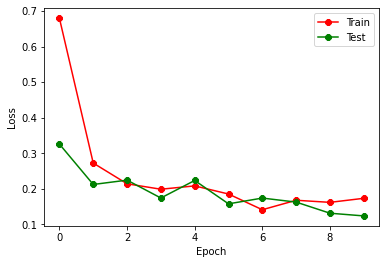

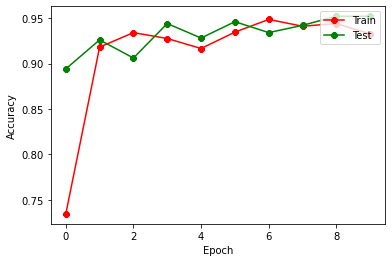

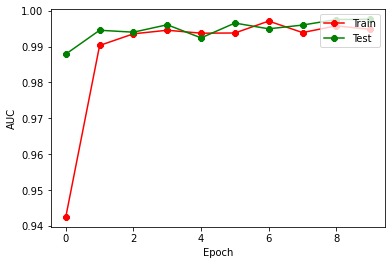

In [12]:
plt.plot(history_neural.history['loss'], marker='8', c='red', label='loss')
plt.plot(history_neural.history['val_loss'], marker='8', c='green', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history_neural.history['categorical_accuracy'], marker='8', c='red', label='acc')
plt.plot(history_neural.history['val_categorical_accuracy'], marker='8', c='green', label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history_neural.history['auc'], marker='8', c='red', label='auc')
plt.plot(history_neural.history['val_auc'], marker='8', c='green', label='val_auc')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [13]:
result_neural = neural.evaluate(test_generator, steps=25)
# print loss, accuracy and auc
print("Test loss:", result_neural[0], "\n Test accuracy:", result_neural[1], "\n Test AUC:", result_neural[2])


25/25 [==============================] - 2s 61ms/step - loss: 0.1223 - categorical_accuracy: 0.9480 - auc: 0.9978
Test loss: 0.12230006605386734 
 Test accuracy: 0.9480000138282776 
 Test AUC: 0.9978190064430237


### summary of fully-connected neural network model
Model building

chosen ReLu as activation function, as the activation function is used to make the output only positive and we to be a classifier, we want the output to be positive, between 0 and 1.
Output with 5 classes and it is Multi-class classification, we want 1 class per outcome, so softmax is best suited for this

Evaluation

Model fitting tested with 10 epoch, but model was already at its peak at 6 epochs. experimentally, the model is not able to improve the accuracy of the model. input layer size is at its minimum, and the model is not able to learn the features of the rice quite as good below that. i later removed two dense layers to be in the same params size range as the CNN, but the accuracy was not much affected.


- average accuracy at the end of testing is 0.91
- average loss at the end of testing is 0.12
- average AUC at the end of testing is 0.98


### Regularized convolutional neural network model

In [14]:
# clear previous models to make sure all names stay accurate for plotting
keras.backend.clear_session()

In [40]:
# convolutional neural network 

cov = keras.models.Sequential()
cov.add(keras.layers.InputLayer(input_shape=(100,100, 3),name='input'))

cov.add(keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation=keras.activations.relu, name='conv_1'))
cov.add(keras.layers.Conv2D(filters = 32, kernel_size=(3,3), activation=keras.activations.relu, name='conv_2'))
cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_1'))

cov.add(keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation=keras.activations.relu, name='conv_3'))
cov.add(keras.layers.Conv2D(filters = 64, kernel_size=(3,3), activation=keras.activations.relu, name='conv_4'))
cov.add(keras.layers.MaxPooling2D(pool_size=(2,2), name='pool_2'))



cov.add(keras.layers.Flatten(name='flatten'))
cov.add(keras.layers.Dense(units=64, activation=keras.activations.relu, name='hidden_1'))
cov.add(keras.layers.Dense(units=32, activation=keras.activations.relu, name='hidden_2'))
cov.add(keras.layers.Dense(units=5, activation=keras.activations.softmax, name='output'))

cov.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 conv_2 (Conv2D)             (None, 96, 96, 32)        9248      
                                                                 
 pool_1 (MaxPooling2D)       (None, 48, 48, 32)        0         
                                                                 
 conv_3 (Conv2D)             (None, 46, 46, 64)        18496     
                                                                 
 conv_4 (Conv2D)             (None, 44, 44, 64)        36928     
                                                                 
 pool_2 (MaxPooling2D)       (None, 22, 22, 64)        0         
                                                                 
 flatten (Flatten)           (None, 30976)           

In [16]:
# compile
cov.compile(loss=keras.losses.CategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(),
                  metrics=[keras.metrics.CategoricalAccuracy(), keras.metrics.AUC()])

In [17]:
# fit 
history_cov = cov.fit(
    train_generator,
    epochs=10,
    steps_per_epoch= 100,
    validation_data=test_generator,
    validation_steps=25,
    verbose=2)

history_cov.history.keys()

Epoch 1/10
100/100 - 38s - loss: 0.9990 - categorical_accuracy: 0.5545 - auc: 0.8637 - val_loss: 0.4793 - val_categorical_accuracy: 0.7980 - val_auc: 0.9717 - 38s/epoch - 385ms/step
Epoch 2/10
100/100 - 36s - loss: 0.4197 - categorical_accuracy: 0.8245 - auc: 0.9744 - val_loss: 0.3052 - val_categorical_accuracy: 0.8700 - val_auc: 0.9866 - 36s/epoch - 364ms/step
Epoch 3/10
100/100 - 38s - loss: 0.2377 - categorical_accuracy: 0.9070 - auc: 0.9910 - val_loss: 0.2453 - val_categorical_accuracy: 0.9060 - val_auc: 0.9900 - 38s/epoch - 378ms/step
Epoch 4/10
100/100 - 40s - loss: 0.1944 - categorical_accuracy: 0.9325 - auc: 0.9923 - val_loss: 0.1503 - val_categorical_accuracy: 0.9420 - val_auc: 0.9966 - 40s/epoch - 401ms/step
Epoch 5/10
100/100 - 39s - loss: 0.1801 - categorical_accuracy: 0.9345 - auc: 0.9943 - val_loss: 0.0993 - val_categorical_accuracy: 0.9640 - val_auc: 0.9987 - 39s/epoch - 392ms/step
Epoch 6/10
100/100 - 38s - loss: 0.1857 - categorical_accuracy: 0.9240 - auc: 0.9941 - val

dict_keys(['loss', 'categorical_accuracy', 'auc', 'val_loss', 'val_categorical_accuracy', 'val_auc'])

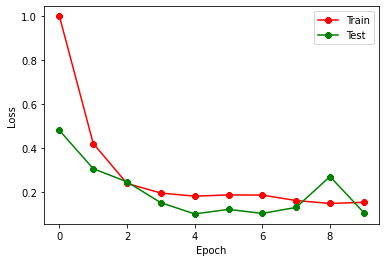

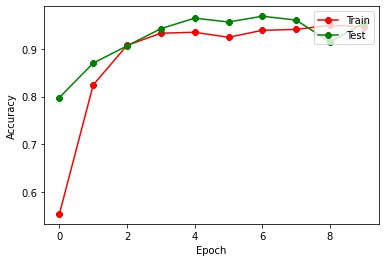

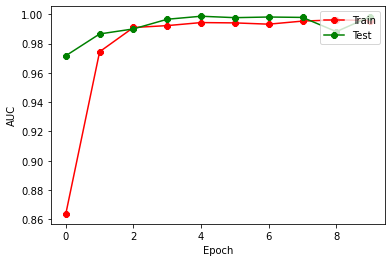

In [18]:
# evaluate

plt.plot(history_cov.history['loss'], marker='8', c='red', label='loss')
plt.plot(history_cov.history['val_loss'], marker='8', c='green', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history_cov.history['categorical_accuracy'], marker='8', c='red', label='acc')
plt.plot(history_cov.history['val_categorical_accuracy'], marker='8', c='green', label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


plt.plot(history_cov.history['auc'], marker='8', c='red', label='auc')
plt.plot(history_cov.history['val_auc'], marker='8', c='green', label='val_auc')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [19]:
result_cov = cov.evaluate(test_generator, steps=25)
# print loss, accuracy and auc
print("Test loss:", result_cov[0], "\n Test accuracy:", result_cov[1], "\n Test AUC:", result_cov[2])


25/25 [==============================] - 3s 115ms/step - loss: 0.0816 - categorical_accuracy: 0.9820 - auc: 0.9988
Test loss: 0.08155886828899384 
 Test accuracy: 0.9819999933242798 
 Test AUC: 0.9988000392913818


### summary of regularized convolutional neural network model
Model building

chosen ReLu again as activation function, as the activation function is used to make the output  positive and want a  classifier, we want the output to be positive, between 0 and 1.

The base of the model consists of 2 double layer filters (32 > 64) , followed by a flatten and two more dense layers (64 < 32). followed by a dense layer with 5 classes and a softmax activation function. as this is multi-class classification, we want 1 class per outcome, so softmax is best suited for this

Evaluation

model fitted tested with 10 epoch, but the model was already sufficient accurate at 4 epochs, but to keep the fitting in line with the neural net model, i kept it at 6 epochs. accuracy sometimes even pops above the training set accuracy, indicating overfilling, but generally also comes down again in the range from 6-10 epochs. higher number of epochs not tested due to size of the dataset.


- Average accuracy at the end of testing is 0.98
- Average loss at the end of testing is 0.08
- Average AUC at the end of testing is 0.99

### Summary
Baseline: Average accuracy of 0.62

Neural network: Average accuracy of 0.91

Convolution neural network: Average accuracy of 0.98


baseline model has a significantly lower accuracy than the other models. CNN is able to predict the outcome better than the NN model, but does also take a little longer to train. This is because the CNN model is more complex and requires more training time. based on the filters it tries to apply.

### improvements to be made

With the right hyperparameter fine tuning, the model can be trained to better predict the outcome of the rice using the CNN approach. this can be done by adding more specific filters or regularization to the model. currently i also chose to keep the image size at 100x100, for reasons of training speed. but an image size of 200x200 would quite possibly achieve better results, as the details will be more visible on the image. and thus the model can be trained to better predict the outcome of the rice based on those features. with these adjustment the model has the potential to predict the outcome with a accuracy close to 0.99% or even 100%, which would be a good improvement, and would be excellent for future uses in rice quality assurance. 
